K-MEDOIDS 

 - https://towardsdatascience.com/k-medoid-clustering-pam-algorithm-in-python-with-solved-example-c0dcb35b3f46

K-Medoid minimizza le differenze tra i punti in un cluster e i punti considerati come centri di quel cluster. Questi punti centrali sono chiamati medoidi. Il medoide è un punto nel cluster, che minimizza la somma delle distanze tra se stesso e tutti gli altri punti nel cluster. È simile al concetto di centroide, che è il punto medio di un cluster. Ma a differenza del centroide, il medoide non è necessariamente un punto di dati nel cluster. Il medoide è il punto di dati che rappresenta meglio il cluster.

K-Medoid è un algoritmo di clustering basato su partizioni. È simile al K-Means, ma è più robusto per i dati che non sono facilmente rappresentati come sfere (come i dati che hanno cluster di forma irregolare).

K-Medoid è un algoritmo iterativo che alterna tra i passaggi di calcolo dei medoidi e di assegnazione dei punti al cluster più vicino (con il medoide più vicino). La distanza tra i punti è solitamente calcolata utilizzando la distanza euclidea o la distanza Manhattan.

Il concetto fondamentale di PAM include:

- Trova un insieme di k Medoidi (k si riferisce al numero di cluster e M è una raccolta di medoidi) dai punti dati di dimensione n (n è il numero di record).
- Usando qualsiasi metrica di distanza (ad esempio d(.), potrebbe essere euclidea, manhattan, ecc.), prova a individuare i Medoid che riducono al minimo la distanza complessiva dei punti dati dal loro Medoid più vicino.
- Infine, scambia coppie Medoid e non Medoid che riducono la funzione di perdita L tra tutte le possibili coppie k(n-k). La funzione di perdita è definita come:

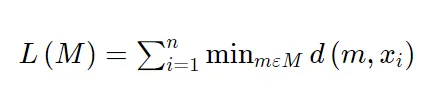





In [ ]:
# facciamo il clustering partizionale con k-medoids
# importiamo le librerie
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs

In [ ]:
# creiamo un dataset
# n_samples: numero di osservazioni, centers: numero di cluster, cluster_std: deviazione standard dei cluster, random_state: seed per la generazione dei dati
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=0.60, random_state=0) 

# visualizziamo il dataset
plt.scatter(X[:,0], X[:,1], c=y, s=10)
plt.show()

In [ ]:
# creiamo il modello
# n_clusters: numero di cluster, random_state: seed per la generazione dei dati
model = KMedoids(n_clusters=4, random_state=42)

# addestriamo il modello
model.fit(X)

# visualizziamo i medoidi
print(model.medoid_indices_)

# prediciamo i cluster
y_kmedoid = model.predict(X)

# visualizziamo i cluster
plt.scatter(X[:,0], X[:,1], c=y_kmedoid, s=10)
plt.show()


In [ ]:
# visualizziamo i cluster e i medoidi
plt.scatter(X[:,0], X[:,1], c=y_kmedoid, s=10)
plt.scatter(X[model.medoid_indices_,0], X[model.medoid_indices_,1], c='red', s=100)
plt.show()

In [ ]:
# calcoliamo l'inerzia
print(model.inertia_)

# visualizziamo l'inerzia per diversi valori di k
inerzia = []
for k in range(1, 10):
    model = KMedoids(n_clusters=k, random_state=42)
    model.fit(X)
    inerzia.append(model.inertia_)

plt.plot(range(1, 10), inerzia, marker='o')
plt.xlabel('Numero di cluster')
plt.ylabel('Inerzia')
plt.show()

# calcoliamo il valore migliore di inerzia con il metodo del gomito
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), inerzia, curve="convex", direction="decreasing")
print(kl.elbow)



In [ ]:
# visualizziamo i medoidi per diversi valori di k
for k in range(2, 10):
    model = KMedoids(n_clusters=k, random_state=42)
    model.fit(X)
    plt.scatter(X[:,0], X[:,1], c=model.predict(X), s=10)
    plt.scatter(X[model.medoid_indices_,0], X[model.medoid_indices_,1], c='red', s=100)
    plt.title('k = ' + str(k))
    plt.show()


In [ ]:
# confrontiamo con una funzione di utilità per il clustering partizionale
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_kmedoids(X, k):

    kmedoids = KMedoids(n_clusters=k)
    kmedoids.fit(X)
    y_kmeans = kmedoids.predict(X)

    silhouette = silhouette_score(X, y_kmeans)
    calinski = calinski_harabasz_score(X, y_kmeans)
    davies = davies_bouldin_score(X, y_kmeans)

    return silhouette, calinski, davies

# visualizziamo i risultati
silhouette = []
calinski = []
davies = []
min_k = 2
max_k = 10
for k in range(min_k, max_k):
    s, c, d = evaluate_kmedoids(X, k)
    silhouette.append(s)
    calinski.append(c)
    davies.append(d)

# visualizziamo il miglior valore per ogni indice
print('Silhouette: ', silhouette.index((max(silhouette)))+min_k)
print('Calinski-Harabasz: ', calinski.index((max(calinski)))+min_k)
print('Davies-Bouldin: ', davies.index((min(davies)))+min_k)

# plottiamo con assi separati
plt.subplot(3, 1, 1)
plt.plot(range(2, 10), silhouette)
plt.xlabel('Numero di cluster')
plt.ylabel('Silhouette')

plt.subplot(3, 1, 2)
plt.plot(range(2, 10), calinski)
plt.xlabel('Numero di cluster')
plt.ylabel('Calinski-Harabasz')

plt.subplot(3, 1, 3)
plt.plot(range(2, 10), davies)
plt.xlabel('Numero di cluster')
plt.ylabel('Davies-Bouldin')

plt.show()
